In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2
import pickle

In [3]:
train2=os.listdir("/kaggle/input/eczema/train/train")

In [4]:
train2

['Nummular Dermatitis',
 'Stasis Dermatitis',
 'Contact Dermatitis',
 'Atopic Dermatitis',
 'Seborrheic Dermatitis',
 'Dyshidrotic Eczema']

In [5]:
cat2=['Dyshidrotic Eczema']

In [6]:
cat=['Nummular Dermatitis',
 'Stasis Dermatitis',
 'Contact Dermatitis',
 'Atopic Dermatitis',
 'Seborrheic Dermatitis',
 'Dyshidrotic Eczema']

In [7]:
def data_dictionary():
    path_train="/kaggle/input/eczema/train/train/"
    path_test="/kaggle/input/eczema/test/test/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/eczema/train/train/Dyshidrotic Eczema/03ContactDerm040127.jpg":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [8]:
train=data_dictionary()

In [9]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/eczema/train/train/Dyshidrotic Eczema/03ContactDerm040127.jpg":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


In [10]:
label=train['target']

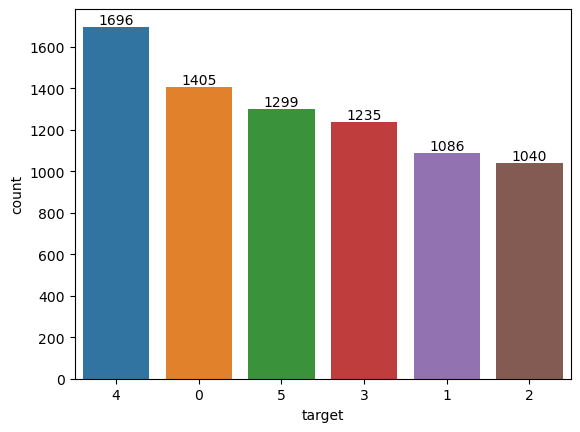

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);
abs_values = train['target'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

In [12]:
len(label)

7761

In [13]:
len(images)

7761

In [14]:
import numpy as np
import pandas as pd

In [15]:
data=np.array(images)


In [16]:
label=np.array(label)

In [17]:
data.shape

(7761, 180, 180, 3)

In [18]:
label.shape

(7761,)

In [19]:
!pip install sklearn_relief

In [20]:
# Base Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [21]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [22]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

80134624/80134624 [==============================] - 0s 0us/step


In [23]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

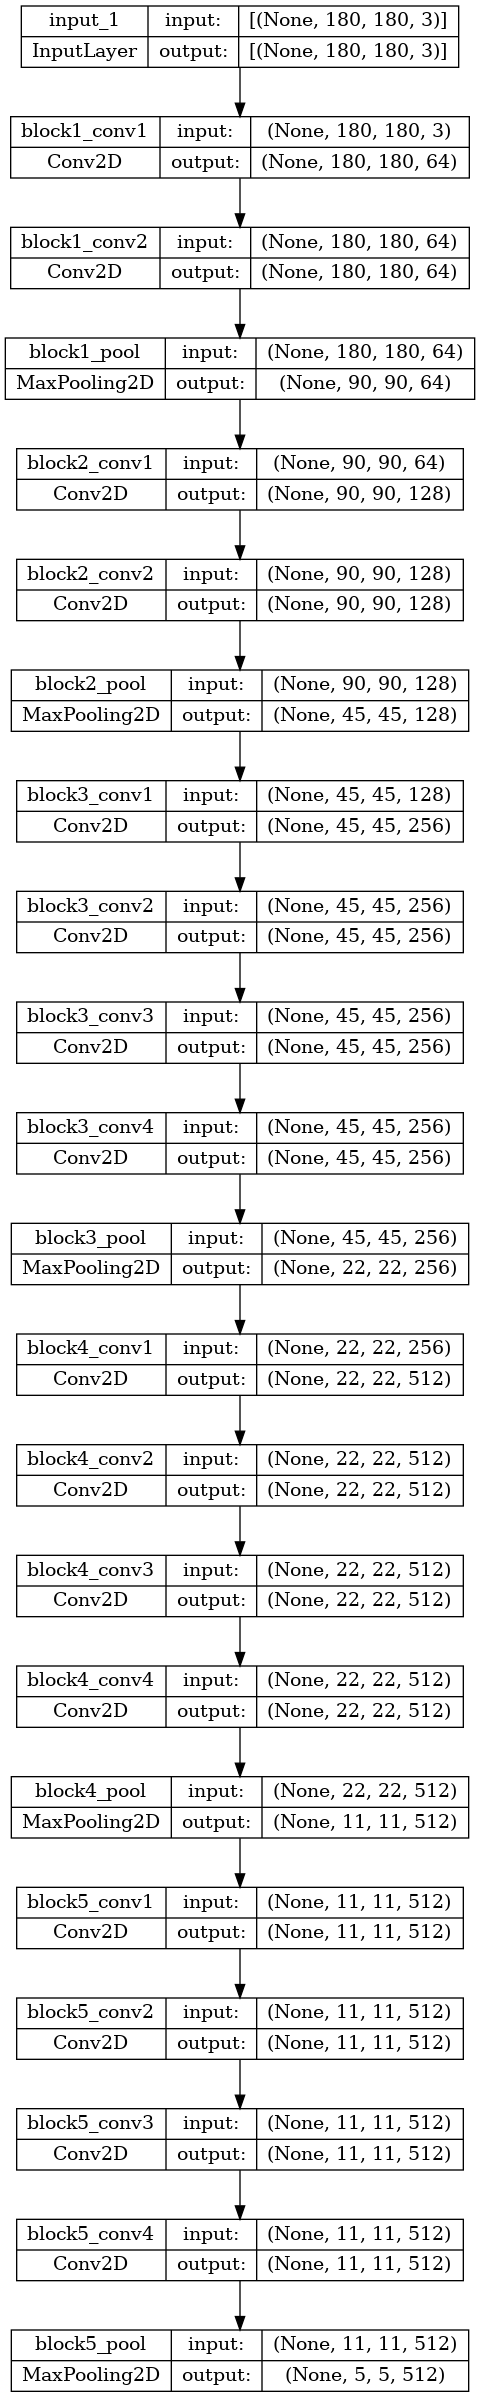

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [26]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [27]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [28]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)

In [31]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [32]:
label.shape


(7761, 6)

In [33]:

for i in range(10): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    #features_train.shape
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
    history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
    model.evaluate(x_test,y_test)

49/49 [==============================] - 8s 153ms/step
Epoch 1/15
194/194 [==============================] - 3s 3ms/step - loss: 3.1496 - accuracy: 0.4077
Epoch 2/15
194/194 [==============================] - 1s 3ms/step - loss: 1.0562 - accuracy: 0.6120
Epoch 3/15
194/194 [==============================] - 1s 3ms/step - loss: 0.7911 - accuracy: 0.7121
Epoch 4/15
194/194 [==============================] - 1s 3ms/step - loss: 0.5706 - accuracy: 0.7995
Epoch 5/15
194/194 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8560
Epoch 6/15
194/194 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8935
Epoch 7/15
194/194 [==============================] - 1s 3ms/step - loss: 0.3006 - accuracy: 0.9053
Epoch 8/15
194/194 [==============================] - 1s 3ms/step - loss: 0.3003 - accuracy: 0.9098
Epoch 9/15
194/194 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8988
Epoch 10/15
194/194 [========================

In [34]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-10-26 11:42:02         1804
variables.h5                                   2023-10-26 11:42:03     31168936
metadata.json                                  2023-10-26 11:42:02           64


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [36]:
y_pred=model.predict(x_test)

49/49 [==============================] - 0s 2ms/step


In [37]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([0, 4, 4, ..., 0, 1, 0])

In [38]:
y_test=np.argmax(y_test, axis=1)

In [39]:
y_test

array([0, 4, 4, ..., 0, 1, 0])

In [40]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

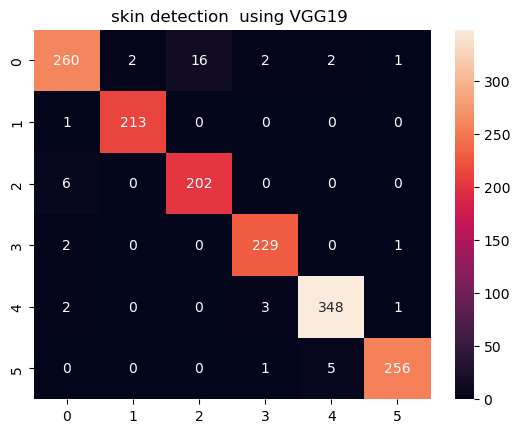

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

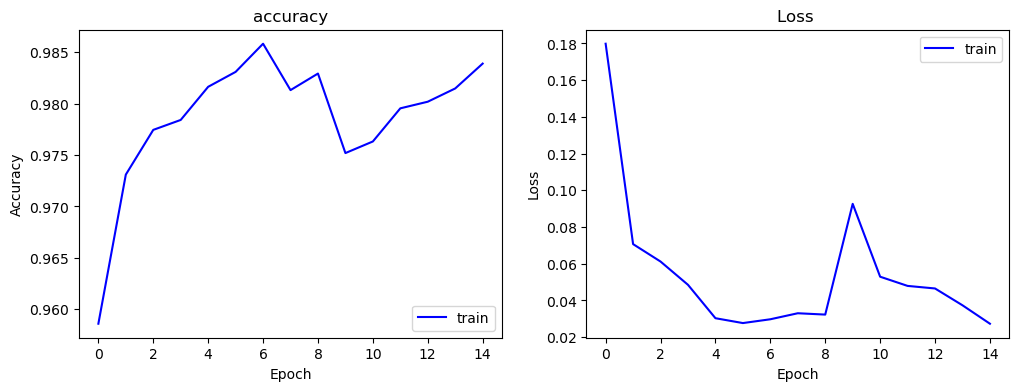

In [42]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [43]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [44]:
confusion_matrix=classification_report(y_test,y_pred2)



In [45]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       283
           1       0.99      1.00      0.99       214
           2       0.93      0.97      0.95       208
           3       0.97      0.99      0.98       232
           4       0.98      0.98      0.98       354
           5       0.99      0.98      0.98       262

    accuracy                           0.97      1553
   macro avg       0.97      0.97      0.97      1553
weighted avg       0.97      0.97      0.97      1553

